In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 線形回帰

- 線形単回帰は、1つの入力(説明変数)から出力(目的変数)を予測する際に、入出力の関係を直線で近似することである
- $ y = a + b x $のように表すとき、目的変数とその予測値である$\hat{y}$の誤差の2乗和を最小化する最小2乗法で係数$a, b$を求めることができる



## 実装演習

### モジュールのインポート

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

### 問題設定

#### 設定

- ボストンの住宅データセットを線形回帰モデルで分析
- 適切な査定結果が必要
    - 高すぎても安すぎても会社に損害がある

#### 課題

- 部屋数が4で犯罪率が0.3の物件はいくらになるか?

### データ設定

In [ ]:
# ボストンの住宅データセットを読み込む
boston_dataset = load_boston()
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
# DESCR変数にデータの説明がある
print(boston_dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### データの前処理

属性値に欠損はないので、そのまま使用できる。

説明変数に部屋数(RM)と犯罪率(CRIM)、目的変数に住宅価格を設定する

#### データフレームの作成

In [ ]:
df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# 目的変数を追加
df["PRICE"] = np.array(boston_dataset.target)

# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 機械学習モデルの選定

部屋数のみの線形単回帰と、部屋数と犯罪率による線形重回帰をモデルにして、精度を比較する

In [ ]:
data_simple = df.loc[:, ["RM"]].values.flatten()
data_multi = df.loc[:, ["CRIM", "RM"]].values
target = df.loc[:, ["PRICE"]].values.flatten()

In [ ]:
data_multi.shape

(506, 2)

In [ ]:
# 学習用と検証用にデータを分ける
train_indx = np.random.rand(len(target)) <= 0.8

x_simple_train = data_simple[train_indx]
X_multi_train = data_multi[train_indx, :]
y_train = target[train_indx]

x_simple_val = data_simple[~train_indx]
X_multi_val = data_multi[~train_indx, :]
y_val = target[~train_indx]

### モデルの学習

#### 線形単回帰

最小2乗法で$ y(x) = ax + b $のaとbを求める。
学習データ$ X = [x_1, x_2, \cdots, x_n]^T $, $ y = [y_1, y_2, \cdots, y_n]^T $に対して、最小化したい目的関数は$ L = \sum_{i=1}^n (y_i - (ax + b))^2$と書ける。

$L$を最小にする$a$と$b$は、次式から求められる：
$$ \frac{\partial L}{\partial a} = -2 \sum_{i=1}^n (y_i - (ax_i + b)) x_i = 0 $$
$$ \frac{\partial L}{\partial b} = -2 \sum_{i=1}^n (y_i - (ax_i + b)) = 0 $$
これらの式を$a$と$b$に関する連立方程式とすると、以下のように表現できる。ここで推定値として$\hat{a}$と$\hat{b}$とする：
$$ \begin{pmatrix}
\sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i\\
\sum_{i=1}^n x_i & n
\end{pmatrix}
\begin{pmatrix}
\hat{a} \\
\hat{b}
\end{pmatrix}
=
\begin{pmatrix}
\sum_{i=1}^n x_i y_i \\
\sum_{i=1}^n y_i
\end{pmatrix}
$$

$$
\begin{pmatrix}
\hat{a} \\
\hat{b}
\end{pmatrix}
=
\frac{1}{n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2 }
\begin{pmatrix}
n & -\sum_{i=1}^n x_i\\
-\sum_{i=1}^n x_i & \sum_{i=1}^n x_i^2
\end{pmatrix}
\begin{pmatrix}
\sum_{i=1}^n x_i y_i \\
\sum_{i=1}^n y_i
\end{pmatrix}
$$

$$
= 
\frac{1}{n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2 }
\begin{pmatrix}
n \sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i \\
\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i - \sum_{i=1}^n x_i \sum_{i=1}^n x_i y_i
\end{pmatrix}
$$
以上から、$ \hat{a} = \frac{Cov[x,y]}{Var[x]} $、$ \hat{b} = \mu_y - \hat{a} \mu_x $となる。

In [ ]:
# Numpyによる線形回帰の実装
def train(xs, ys):
    cov = np.cov(xs, ys, ddof=0) # ddof=0はバイアス=0、つまり単純平均
    a = cov[0,1] /cov[0,0]
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

In [ ]:
cov_simple, ahat_simple, bhat_simple = train(x_simple_train, y_train)
print(cov_simple)
print(ahat_simple)
print(bhat_simple)

[[ 0.51996371  4.47639602]
 [ 4.47639602 81.84817844]]
8.609054625055258
-31.674277325475142


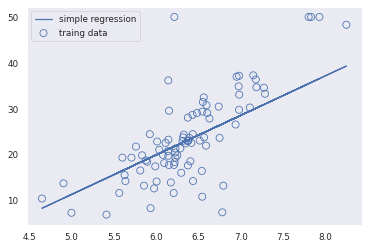

In [ ]:
y_pred_simple = ahat_simple * x_simple_val + bhat_simple

plt.scatter(x_simple_val, y_val, facecolor="none", edgecolor="b", s=50, label="traing data")
plt.plot(x_simple_val, y_pred_simple, label="simple regression")
plt.legend()
plt.grid()
plt.show()

#### 線形重回帰

モデルは以下を用いる：
$$ y(x) = \sum_{i=0}^d w_i x_i = w^T x $$
ただし、$x_0 = 1$とする。
学習データ$X, y$に対して、$y = Xw$と書けるので、最小化する目的関数は$L = \| y - Xw \|^2$となる。$L$を最小化する$w$は次のようにもとめられる：
$$ \frac{\partial l}{ \partial w} = -2 X^T (y -Xw) = 0 $$
$$ \hat{w} = (X^T X)^{-1} X^T y $$

In [ ]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

X_multi_train = add_one(X_multi_train)

In [ ]:
pinv = np.dot(np.linalg.inv(np.dot(X_multi_train.T, X_multi_train)), X_multi_train.T)
what_multi = np.dot(pinv, y_train)
print(what_multi)

[-26.4927561   -0.25983497   7.93958559]


In [ ]:
X_multi_val = add_one(X_multi_val)
y_pred_multi = np.dot(X_multi_val, what_multi.T )

### モデルの評価

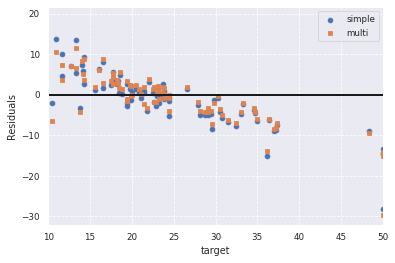

In [ ]:
# 残差
res_simple = y_pred_simple - y_val
res_multi = y_pred_multi - y_val

plt.scatter(y_val, res_simple, marker="o", label="simple")
plt.scatter(y_val, res_multi, marker="s", label="multi")
plt.xlabel("target")
plt.ylabel("Residuals")
plt.legend()

plt.hlines(y = 0, xmin  = -10, xmax = 50, lw = 2, color="k")
plt.xlim([10, 50])
plt.show()


In [ ]:
# 決定係数
def score(pred, target):
    u = ((target - pred) ** 2).sum()
    v = ((target - target.mean()) ** 2).sum()
    
    return 1.0 - u/v


In [ ]:
score_simple = score(y_pred_simple, y_val)
score_multi = score(y_pred_multi, y_val)
print("単回帰：{0:.3f}, 重回帰：{1:.3f}".format(score_simple, score_multi))

単回帰：0.517, 重回帰：0.545


### 課題の答え

In [ ]:
y_kadai = np.dot(np.array([1, 0.3, 4]), what_multi.T )
print("部屋数4、犯罪率0.3の住宅価格:${:.1f}".format(y_kadai * 1000))

部屋数4、犯罪率0.3の住宅価格:$5187.6


### 考察のまとめ

- 検証データに対する決定係数は、重回帰0.413、単回帰0.389から、予測精度は重回帰のほうが良い
- ただし、住宅価格を横軸にとって残差をプロットすると、右下がりの傾向があるから、いずれの回帰モデルでも捉えられていない傾向が残っている

# 2 非線形回帰

## 要点のまとめ

- 直線では捉えられない非線形なデータ構造を近似するのが、非線形回帰

- 基底展開法
    - 回帰関数として、基底関数と呼ばれる既知の非線形関数とパラメータベクトルの線形結合を使用する
    
  $$ y_i = w_0 + \sum_{i=1}^m w_j \phi_j (x_j) + \epsilon_i $$
    
    
    - パラメータは最小2乗法や最尤法により推定する
    
    
- よく使われる基底関数としては以下の3つがある：
    - 多項式関数
  $$ \phi_j (x) = x^j $$
        
    - ガウス型基底関数
  $$ \phi_j (x) = exp \left\{ \frac{(x - \mu_j)^2}{2 h_j} \right\} $$
        
    - スプライン関数/Bスプライン関数
            区分多項式(スプライン)を使用して曲線を近似する

- 推定の手順
    - 説明変数
  $ x_i = (x_{i1}, x_{i2}, \cdots, x_{im}) \in \mathbb{R}^m $ を基底関数($k$個)で写像して、$k$次元のベクトルにする
  $$ \phi(x_i) = (\phi_1(x_i), \phi_2(x_i), \cdots, \phi_k(x_i))^T \in \mathbb{R}^k $$
    - 非線形関数の計画行列を作る：
    $$ \Phi^{train} = ( \phi(x_1), \phi(x_2), \cdots, \phi(x_n) )^T \in \mathbb{R}^{n \times k} $$
    - 最尤法による予測値：
    $$ \hat{y} = \Phi \left( \Phi^{(train)T} \Phi^{(train)} \right)^{-1}\Phi^{(train)T} y^{(train)} $$

- 学習データに対して、十分小さな誤差がえられないことを***未学習***という。
    - (対策)表現力の高いモデルを使用する
- 小さな誤差は得られたが、テスト集合誤差との差が大きいことを***過学習***という。
    - (対策1) 学習データを増やす
    - (対策2) 不要な基底関数を削除して、表現力を抑制する
    - (対策3) 正則化法を利用して、表現力を抑制する
 
- 不要な基底関数の削除
    - 基底関数の数、位置やバンド幅で***モデルの複雑さ***が変化
    - 交差検証などで適切な基底関数を用意
- 正則化法
    - モデルの複雑さに伴って、その値が大きくなる正則化項を追加した関数を最小化
    - 正則化項として、係数$w$のL2ノルムを使用するRidge推定量と、L1ノルムを使用するLasso推定量がある

- 汎化性能
    - 学習データだけでなく、新たなデータに対する予測性能のこと
    - 学習誤差でなく、汎化誤差の小さいモデルがよいモデル

- ホールドアウト法
    - データを学習用とテスト用に分割して、予測精度や誤り率を推定する
    - 基底関数にもとづく非線形回帰モデルでは、基底関数の数、位置、バンド幅とチューニングパラメータをホールドアウト値を小さくするモデルで決定する
 
- クロスバリデーション(交差検証)
    - データセットを複数に分割して、検証用の残す1つ以外のデータで学習を行うことを、分割された部分全てが検証用に使われるまで繰り返し手法である

## 実装演習

### インポート

In [ ]:
import seaborn as sns

In [ ]:
# seaborn設定
sns.set()

# 背景変更
sns.set_style("darkgrid", {"grid.linestyle": "--"})

# 大きさ
sns.set_context("paper")

In [ ]:
n = 100

def true_func(x):
    z = 1.0 - 48.0 * x + 218.0 * x**2 - 315.0 * x**3 + 145.0 * x**4
    return z

def linear_func(x):
    z = x
    return z

### 真の関数からノイズを伴うデータ生成

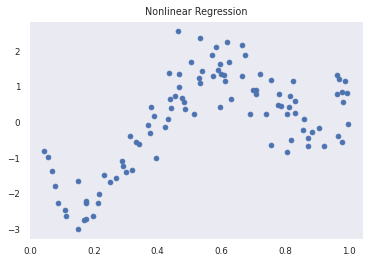

In [ ]:
# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# ノイズを加える
noise = 0.5 * np.random.randn(n)
target += noise

plt.scatter(data, target)
plt.title("Nonlinear Regression")
plt.grid()
plt.show()

### モデル設定

#### 線形回帰

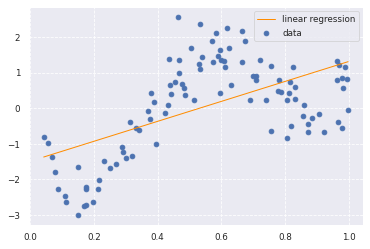

決定係数:0.32574435362090903


In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label="data")
plt.plot(data, p_lin, color="darkorange", marker="", Linestyle="-", linewidth=1, markersize=6, label="linear regression")
plt.legend()
plt.show()

print("決定係数:{}".format(clf.score(data, target)))


- 上の図からわかるように、線形近似ではデータの構造を捉えられない

#### カーネルリッジ回帰

##### KernelRidgeを使う

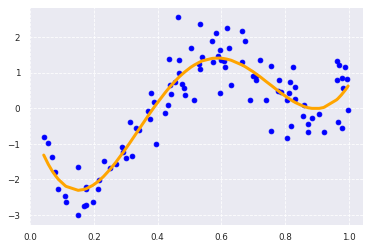

決定係数:0.8301224540109751


In [ ]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel="rbf")
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color="blue", label="data")
plt.plot(data, p_kridge, color="orange", linestyle="-",
        linewidth=3, markersize=6, label="kernel ridge")
plt.show()

print("決定係数:{}".format(clf.score(data, target)))

- 線形回帰より、データの非線形性を捉えられており、決定係数も大きい

##### KernelRidgeを使わない

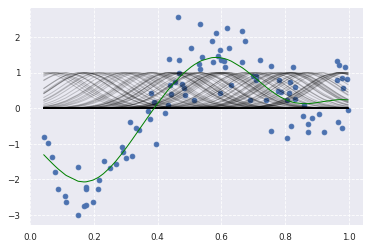

決定係数:0.8153874033692652


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)
plt.scatter(data, target, label="data")

for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')

plt.show()

print("決定係数:{}".format(clf.score(kx, target)))

- KernelRidgeを使った場合と同程度の決定係数となる。違いはgammaとalphaというハイパーパラメータによると考える

#### 多項式回帰

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

決定係数(1次元多項式):0.3257443518612866
決定係数(2次元多項式):0.6138134096645107
決定係数(3次元多項式):0.6208307418633146
決定係数(4次元多項式):0.8367005562365442
決定係数(5次元多項式):0.8368084730723832
決定係数(6次元多項式):0.8369618856282589
決定係数(7次元多項式):0.8391558356105117
決定係数(8次元多項式):0.8392072617319521
決定係数(9次元多項式):0.8395229061191312
決定係数(10次元多項式):0.8398755523707641


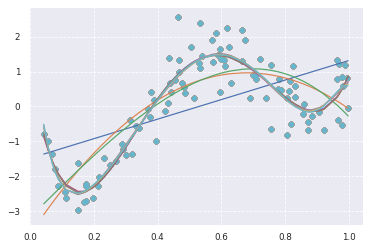

In [ ]:
deg = [i for i in range(1,11)]
for d in deg:
    regr = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("Linear", LinearRegression())
    ])
    regr.fit(data, target)
    p_poly = regr.predict(data)
    
    plt. scatter(data, target, label="data")
    plt.plot(data, p_poly, label="polynomial of degree {:d}".format(d))
    
    print("決定係数({0}次元多項式):{1}".format(d, regr.score(data, target)))

plt.show()

- 次元が上がるほど、決定係数は大きくなっている

#### ラッソ回帰

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

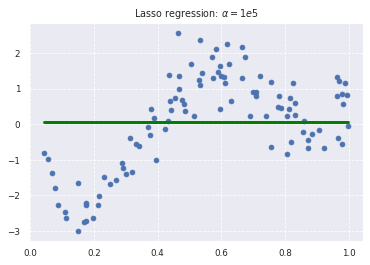

決定係数:0.0


In [ ]:
kx = rbf_kernel(X=data, Y=data, gamma=5)
lasso_clf = Lasso(alpha=1e5, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.title(r"Lasso regression: $ \alpha = 1e5 $")
plt. scatter(data, target, label="data")
plt.plot(data, p_lasso, color="green", Linestyle="-", Linewidth=3, markersize=3)

plt.show()

print("決定係数:{}".format(lasso_clf.score(kx, target)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0870838165283203, tolerance: 0.01778559386730194
  positive)


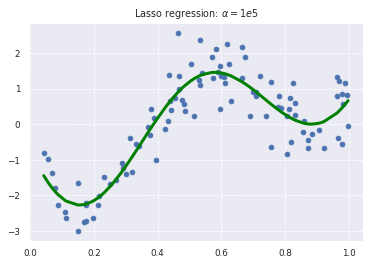

決定係数:0.8293600809587659


In [ ]:
lasso_clf = Lasso(alpha=1e-3, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.title(r"Lasso regression: $ \alpha = 1e5 $")
plt. scatter(data, target, label="data")
plt.plot(data, p_lasso, color="green", Linestyle="-", Linewidth=3, markersize=3)

plt.show()

print("決定係数:{}".format(lasso_clf.score(kx, target)))

- L1ノルムの制約が大きいとき( $ \alpha = 10^{5} $) は近似できないが、小さくする($ \alpha = 10^{-3} $)と決定係数が約0.86と近似精度がよくなる

#### サポートベクターによる回帰

サポートベクタによる回帰はパラメータパラメータ $ C, \epsilon $のもと、以下の最小化問題を解くことになる。

$$ \underset{w,b,\xi, \xi^*}{min} \frac{1}{2}w^T w + C \sum_{i=1}^{l} \xi_i + C \sum_{i=1}^{l} \xi_i^* $$
subject to $ w^T \phi (x) + b - z_i \le \epsilon + \xi_i 
$
$$ z_i - w^T \phi(x) - b \le \epsilon + \xi_i^* $$
$$ \xi_i, \xi_i^*, i = 1, ..., l $$

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


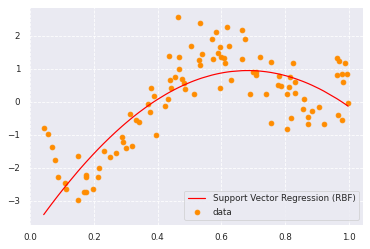

決定係数:0.6076290242408122


In [ ]:
from sklearn import model_selection, preprocessing, linear_model, svm

clf_svr = svm.SVR(kernel="rbf", C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
plt.scatter(data, target, color="darkorange", label="data")
plt.plot(data, y_rbf, color="red", label="Support Vector Regression (RBF)")
plt.legend()

plt.show()

print("決定係数:{}".format(clf_svr.score(data, target)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


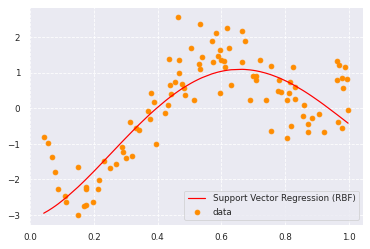

決定係数:0.6622757270720177


In [ ]:
clf_svr = svm.SVR(kernel="rbf", C=1e6, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
plt.scatter(data, target, color="darkorange", label="data")
plt.plot(data, y_rbf, color="red", label="Support Vector Regression (RBF)")
plt.legend()

plt.show()

print("決定係数:{}".format(clf_svr.score(data, target)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


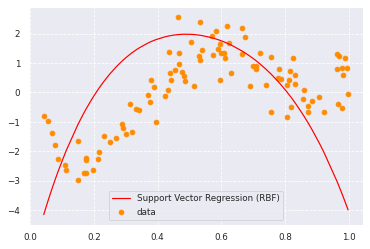

決定係数:-0.9110285738068729


In [ ]:
clf_svr = svm.SVR(kernel="rbf", C=1e8, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
plt.scatter(data, target, color="darkorange", label="data")
plt.plot(data, y_rbf, color="red", label="Support Vector Regression (RBF)")
plt.legend()

plt.show()

print("決定係数:{}".format(clf_svr.score(data, target)))

- 正則化はパラメータCの逆数で厳しくなるので、Cを大きくするほど制約が弱くなって、決定係数が大きくなる大きくなる
- ただし、Cを大きくし過ぎるとうまく近似できなくなる

#### 深層学習による回帰

In [ ]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint("/content/drive/My Drive/RapidChallenge/skl_ml/out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5", verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir="/content/drive/My Drive/RapidChallenge/skl_ml/out/tensorBoard", histogram_freq=0)

- 活性化関数はReLu

In [ ]:
def relu_re_model():
  model = Sequential()
  model.add(Dense(10, input_dim=1, activation="relu"))
  model.add(Dense(1000, activation="relu"))
  model.add(Dense(1000, activation="relu"))
  model.add(Dense(1000, activation="relu"))
  model.add(Dense(1000, activation="relu"))
  model.add(Dense(1000, activation="relu"))
  model.add(Dense(1000, activation="relu"))
  model.add(Dense(1000, activation="relu"))
  model.add(Dense(1000, activation="linear"))
  model.add(Dense(1))

  model.compile(loss="mean_squared_error", optimizer="adam")
  return model


In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

In [ ]:
estimator = KerasRegressor(build_fn=relu_re_model, epochs=100, batch_size=5, verbose=1)
history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

Epoch 1/100
18/18 [==============================] - 2s 74ms/step - loss: 1.9785 - val_loss: 0.8845

Epoch 00001: saving model to /content/drive/My Drive/RapidChallenge/skl_ml/out/checkpoints/weights.01-0.88.hdf5
Epoch 2/100
18/18 [==============================] - 1s 58ms/step - loss: 1.7360 - val_loss: 0.4946

Epoch 00002: saving model to /content/drive/My Drive/RapidChallenge/skl_ml/out/checkpoints/weights.02-0.49.hdf5
Epoch 3/100
18/18 [==============================] - 1s 59ms/step - loss: 1.0943 - val_loss: 0.5425

Epoch 00003: saving model to /content/drive/My Drive/RapidChallenge/skl_ml/out/checkpoints/weights.03-0.54.hdf5
Epoch 4/100
18/18 [==============================] - 1s 62ms/step - loss: 0.8792 - val_loss: 0.5014

Epoch 00004: saving model to /content/drive/My Drive/RapidChallenge/skl_ml/out/checkpoints/weights.04-0.50.hdf5
Epoch 5/100
18/18 [==============================] - 1s 56ms/step - loss: 0.9261 - val_loss: 0.5681

Epoch 00005: saving model to /content/drive/My 

In [ ]:
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 10ms/step


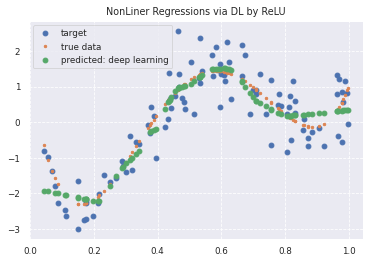

決定係数：-156.950


In [ ]:
plt.title("NonLiner Regressions via DL by ReLU")
plt.plot(data, target, "o", label="target")
plt.plot(data, true_func(data), ".", label="true data")
plt.plot(x_train, y_pred, "o", label="predicted: deep learning")
plt.legend()
plt.show()

score_dl = score(y_pred, y_train)
print("決定係数：{:.3f}".format(score_dl))

### 考察のまとめ

- 非線形なデータでも、対応するモデルを選べば回帰できる
- 単純にモデルを設定すると複雑になりすぎる。モデルの精度と複雑さは正則化項を追加してトレードオフを図る

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3 ロジスティック回帰

- ロジスティック回帰は分類問題を解くことで、ある入力からクラスに分類する
- 分類で扱うデータ：
  - 入力はm次元のベクトルベクトル
  - 出力は0か1

- ロジスティック線形回帰モデル:
  - 入力とパラメータの線形結合をシグモイド関数に入力する
  - 出力はy=1になる確率の値

- シグモイド関数
  - 入力は実数で、出力は0〜1の値値
  - 確率を表現
  - 単調増加関数

  $$ \sigma(x) = \frac{1}{1 + \exp(-ax)} $$

- シグモイド関数の性質
  - 微分はシグモイド関数自身で表現できる:
$$ \begin{align}
  &\begin{split}
      \frac{\partial \sigma(x)}{\partial x}& = 
      \frac{\partial}{\partial x} \left( \frac{1}{1 + \exp(-ax)}  \right)\\
      &= (-1) \cdot \{ 1 + \exp(-ax) \}^{-2} \cdot \exp(-ax) \cdot (-a)\\
      &= \frac{a\exp(-ax)}{ \{ 1 + \exp(-ax) \}^{2} }\\
      &= \frac{a}{1 + \exp(-ax)} \cdot \frac{1 + \exp(-ax)-1}{1+ \exp(-ax)}\\
      &= a \sigma(x)(1-\sigma(x))
  \end{split}
\end{align} $$


- シグモイド関数の出力を出力をY=1になる確率に対応させる
  - i番目のデータを与えたときのシグモイド関数の出力を、、i番目のデータがデータがY=1になる確率$ p_i $とする:
  $$ p_i = \sigma (w_0 + w_1 x_{i1} + \cdots + w_m x_{im}) $$

- 様々な確率分布の中で、ロジスティック回帰モデルではベルヌーイ分布を利用する利用する
- ベルヌーイ分布は、確率pで1、確率1-pで0をとるような、離散確率分布
$$ Y \sim Be(p) \ \ \  \ P(y) = p^y (1-p)^{1-y} $$

- ベルヌーイ分布のパラメータ推定推定
  - データから、そのデータを生成したであろう尤もらしい分布(パラメータ)を推定したい $\rightarrow $ ***最尤推定***

- 尤度関数
  - データを固定して、パラメータに応じて変化する関数関数
  - 尤度関数を最大化するパラメータを選ぶ方法を***最尤推定***という

- ロジスティック回帰モデルの最尤推定
  - 確率確率pはシグモイド関数となるので、推定するのは重みパラメータ

$$ \begin{align}
  &\begin{split}
  P(y_1,y_2, \cdots, y_n|p ) &= P(y_1,y_2, \cdots, y_n|w_0, w_1, \cdots, w_m) \\
  & = \prod_{i=1}^n \sigma (w^T x_i)^{y_i} (1 - \sigma (w^T x_i))^{1 - y_i}\\
  & = L(w)
  \end{split}
\end{align} $$

- 尤度関数が最大になるパラメータを探す探す
  - 対数をとると微分計算が楽 $ \rightarrow $ 対数尤度関数
  - 対数尤度関数にマイナスを掛けたものを最小化するする
$$ \begin{align}
  &\begin{split}
   E(w_0, w_1, \cdots, w_m) & = -\log L (w_0, w_1,\cdots, w_m)\\
   & = -\sum_{i=1}^n \left\{ y_i \log p_i + (1-y_i) \log (1-p_i) \right\}
  \end{split}
\end{align}$$

- 勾配降下法
  - 反復学習で逐次的にパラメータを更新するアプローチのアプローチの1つ
  - 学習率 $ \eta $というハイパーパラメータで、パラメータの収束しやすさを調整
$$ w(k+1) = w(k) - \eta \frac{\partial E}{\partial w(k)} $$
  - パラメータで対数尤度関数を微分して0になる値を求める必要がある
  - しかし、それを解析的に求めるのは困難 $ \rightarrow $ 上式のようにパラメータを更新すると、パラメータが更新してされなくなった状態が勾配=0(対数尤度関数を微分して0)
  - 勾配法では$y_i$全てのデータを使う必要があるため、データが膨大になるとメモリが足りない、処理時間がかかり過ぎるなどの問題がある $ \rightarrow $ ***確率的勾配法***

- 確率的勾配法 (SGD)
  - データをランダムに1つずつ選んでパラメータを更新更新
  - 勾配降下法でパラメータを1回更新するのと同じ計算量で、計算量で、n回更新できるので、効率的に探索可能
$$ w(k+1) = w(k) + \eta (y_i - p_i) x_i $$ 

- モデルの評価
  - 混同行列行列 (confusion matrix)



<table border="1">
<title> 混同行列</title>
  <tr align="center">
    <td colspan="2" rowspan="2">  </td> <td colspan="2"> 検証用データの結果 </td>
  </tr>
  <tr align="center">
    <td> positive </td> <td> negative </td>
  </tr>
  <tr align="center">
    <td rowspan="2"> モデルの<br>予測結果 </td> <td> positive </td>
    <td> 真陽性(True Positive)<br>正しくpositiveと判定した個数</td> <td> 偽陰性(False Positive)<br>間違ってpositiveと判定した個数</td>
  </tr>
  <tr align="center">
    <td> negative </td> <td> 偽陽性(False Negative)<br>間違ってnegativeと判定した個数</td> <td> 真陰性(True Negative)<br>正しくnegativeと判定した個数</td>
  </tr>
</tabel>

- 分類の評価方法評価方法
  - 正解率 = (正解した数)/(予測対象となった全データ数)
    -  分類したいクラスに偏りがある場合、単純な正解率は意味をなさないことがほとんどほとんど
  - 再現率(Recall)
    - 本当にpositiveの中からpositiveと予測できる割合 
  $ \frac{TP}{TP + FN} $ 
    - 誤り(False Positive)が多少多くても、抜け漏れを少なくしたい場合に利用
  - 適合率(Precision)
    - モデルがpositiveと予測する中で本当にpositiveである割合 
  $ \frac{TP}{TP + FP} $ 
    - 見逃し(False Negative)が多くても、正確に予測したい場合に利用
  - F値
    - 再現率と適合率の調和平均で、両者をトレードオフ
  $ \frac{2 \cdot Recall \cdot Precision}{Recall + Precision} $

## 実装演習

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### モジュールのインポート

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 問題設定

#### 設定
- タイタニックの乗客データを利用して、ロジスティック回帰モデルを作成作成
- 特徴量抽出をしてみる

#### 課題

年齢が30歳の男は生き残れるか？

### データ設定

In [ ]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv("/content/drive/My Drive/RapidChallenge/data/titanic_train.csv")

In [ ]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### データの前処理
#### 不要なデータの削除・欠損値の補完

In [ ]:
#予測に不要と考えるカラムをドロップ
titanic_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

#データを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [ ]:
#Ageカラムのnullを中央値で補完
titanic_df["AgeFill"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())

#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


In [ ]:
#運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values

#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

### 機械学習モデルの選定

#### チケット価格から生死を判別

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(data1, label1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 運賃が61の生死フラグ
model.predict([[61]])

array([0])

In [ ]:
# 運賃が62のとき、各クラスに属する確率確率
model.predict_proba([[62]])

array([[0.49978123, 0.50021877]])

In [ ]:
# 重みパラメータの確認
print (model.intercept_)
print (model.coef_)

w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

[-0.94131796]
[[0.01519666]]


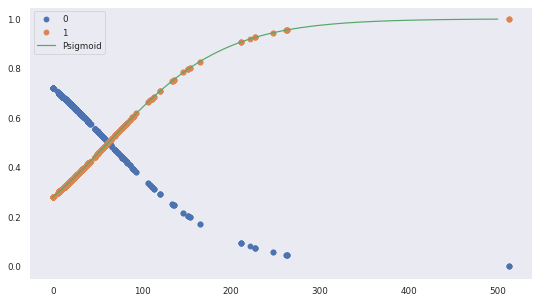

In [ ]:
def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize=(9,5))

y_ped_proba = model.predict_proba(data1)
plt.plot(data1, y_ped_proba[:,0], "o", label="0")
plt.plot(data1, y_ped_proba[:,1], "o", label="1")
plt.plot(x_range, sigmoid(x_range), "-", label="Psigmoid")
plt.grid()
plt.legend(loc=2)

plt.show()

- 運賃が高いほど、生き残る確率が高くなる

#### 2変数から生死を判別

In [ ]:
titanic_df["Gender"] = titanic_df["Sex"].map({"female": 0, "male": 1}).astype(int)

In [ ]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0


In [ ]:
titanic_df["Pclass_Gender"] = titanic_df["Pclass"] + titanic_df["Gender"]

In [ ]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


In [ ]:
titanic_df = titanic_df.drop(["Pclass", "Sex", "Gender","Age"], axis=1)

In [ ]:
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


In [ ]:
from matplotlib.colors import ListedColormap

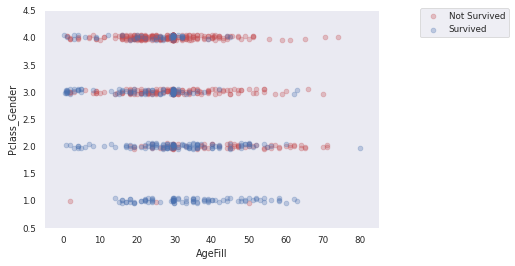

In [ ]:
# AgeFillとPclass_Genderで生死がどうなっているか確認確認
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
sc = ax.scatter(titanic_df.loc[index_survived, "AgeFill"],
                titanic_df.loc[index_survived, "Pclass_Gender"]+(np.random.rand(len(index_survived))-0.5)*0.1,
                color="r", label="Not Survived", alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, "AgeFill"],
                titanic_df.loc[index_notsurvived, "Pclass_Gender"]+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color="b", label="Survived", alpha=0.3)
ax.set_xlabel("AgeFill")
ax.set_ylabel("Pclass_Gender")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

plt.grid()

plt.show()

In [ ]:
# AgeFillとPclass_Genderだけのリストを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values

In [ ]:
# 生死フラグのみのリストを作成
label2 =  titanic_df.loc[:,["Survived"]].values

In [ ]:
model2 = LogisticRegression()

In [ ]:
model2.fit(data2, label2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# AgeFill=10, Pclass_Gender=1の生死フラグ
model2.predict([[10,1]])

array([1])

In [ ]:
# AgeFill=10, Pclass_Gender=1の各クラスの確率
model2.predict_proba([[10,1]])

array([[0.03754749, 0.96245251]])

境界線の式
$$ w_1 \cdot x + w_2 \cdot y + w_0 = 0 $$
$$ \rightarrow y = \frac{-w_1 \cdot x - w_0}{w_2} $$

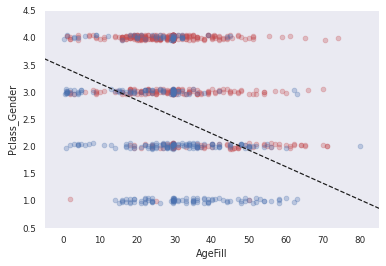

In [ ]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
sc = ax.scatter(titanic_df.loc[index_survived, "AgeFill"],
                titanic_df.loc[index_survived, "Pclass_Gender"]+(np.random.rand(len(index_survived))-0.5)*0.1,
                color="r", label="Not Survived", alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, "AgeFill"],
                titanic_df.loc[index_notsurvived, "Pclass_Gender"]+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color="b", label="Survived", alpha=0.3)
ax.set_xlabel("AgeFill")
ax.set_ylabel("Pclass_Gender")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], "k--")

plt.grid()

plt.show()



- 社会階級が低く、年齢が高いと生き残れない傾向がある

### モデルの評価

混同行列とクロスバリデーション

In [ ]:
from sklearn.model_selection import train_test_split

学習用と検証用にデータを分ける

In [ ]:
# 説明変数が運賃のみのケース
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)

print(traindata1.shape)
print(trainlabel1.shape)

(712, 1)
(712, 1)


In [ ]:
# 説明変数がAgeFillととPclass_genderのケース
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)

print(traindata2.shape)
print(trainlabel2.shape)

(712, 2)
(712, 1)


In [ ]:
data = titanic_df.loc[:, ].values
label =  titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)

print(traindata.shape)
print(trainlabel.shape)

(712, 7)
(712, 1)


In [ ]:
eval_model1 = LogisticRegression()
eval_model2 = LogisticRegression()

In [ ]:
predictor_eval1 = eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2 = eval_model2.fit(traindata2, trainlabel2).predict(testdata2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
eval_model1.score(traindata1, trainlabel1)

0.6713483146067416

In [ ]:
eval_model1.score(testdata1,testlabel1)

0.6424581005586593

In [ ]:
eval_model2.score(traindata2, trainlabel2)

0.7808988764044944

In [ ]:
eval_model2.score(testdata2,testlabel2)

0.7486033519553073

In [ ]:
from sklearn import metrics
print("説明変数が運賃のみのケース")
print(metrics.classification_report(testlabel1, predictor_eval1))
print("説明変数がAgeFillととPclass_genderのケース")
print(metrics.classification_report(testlabel2, predictor_eval2))

説明変数が運賃のみのケース
              precision    recall  f1-score   support

           0       0.64      0.95      0.77       110
           1       0.67      0.14      0.24        69

    accuracy                           0.64       179
   macro avg       0.65      0.55      0.50       179
weighted avg       0.65      0.64      0.56       179

説明変数がAgeFillととPclass_genderのケース
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       112
           1       0.71      0.55      0.62        67

    accuracy                           0.75       179
   macro avg       0.74      0.71      0.72       179
weighted avg       0.74      0.75      0.74       179



- 説明変数が運賃のみのケース
  - 生き残りの再現率が0.30と低いので、生き残る確率が高いサンプルでも死ぬと判定してしまう
  - 生き残りの適合率は0.76とそこそこ高いので、生き残りと判定したら、実際に生き残っている確率が高い
- 説明変数がAgeFillととPclass_genderのケース
  - 生き残りの再現率が、運賃のみのケースより高くなっている

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predictor_eval2)

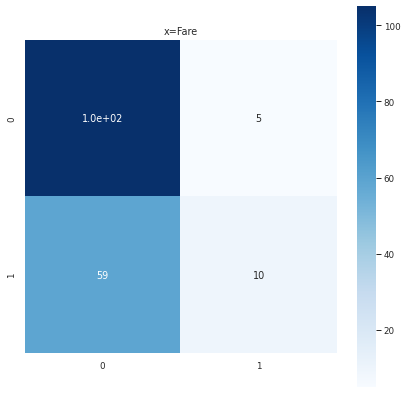

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.title("x=Fare")
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt=".2g",
    annot_kws=None,
    linewidths=0,
    linecolor="white",
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None,
    mask=None)

plt.show()

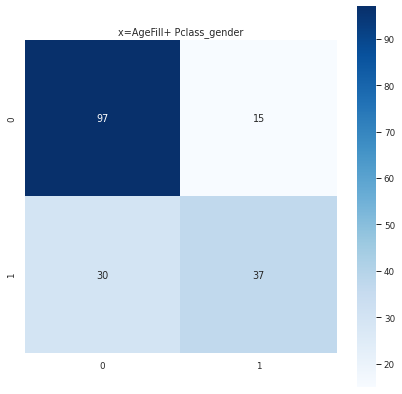

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.title("x=AgeFill+ Pclass_gender")
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt=".2g",
    annot_kws=None,
    linewidths=0,
    linecolor="white",
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None,
    mask=None)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


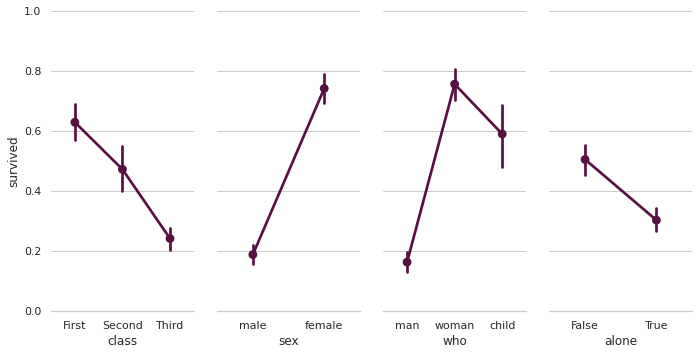

In [ ]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

- 社会階級が高いほど生き残る傾向がある
- 成人女性の方が成人男性より生き残る傾向がある
- 女性の方が男性と子供より生き残る傾向がある
- 単身者でないほうが生き残る傾向がある

### 課題の答え
年齢が30歳の男は生き残れるか？

In [ ]:
print("社会階級 高:{:.0f}%".format(model2.predict_proba([[30,1+1]])[0,1] * 100.0))
print("社会階級 中:{:.0f}%".format(model2.predict_proba([[30,2+1]])[0,1] * 100.0))
print("社会階級 低:{:.0f}%".format(model2.predict_proba([[30,3+1]])[0,1] * 100.0))

社会階級 高:69%
社会階級 中:33%
社会階級 低:10%


### 考察のまとめ
- 説明変数が運賃だけよりも、AgeFillととPclass_genderの2変数の方が生き残りの再現率の高い、良いモデルとなる

# 4 主成分分析

- 主成分分析とは、多変量データの持つ構造を、より少ない数の指標に圧縮すること
  - 学習データ $  x_i = (x_{i1},x_{i2}, \cdots, x_{im}) \in \mathbb{R}^m $
  - 平均 $ \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i $
  - データ行列 $ \bar{X} = (x_1 - \bar{x}, x_2 - \bar{x}, \cdots, x_n - \bar{x})^T \in \mathbb{R}^{n \times m} $
  - 分散共分散行列 $ \Sigma = Var(\bar{X}) = \frac{1}{n} \bar{X}^T \bar{X}$
  - 線形変換後のベクトル $ s_j = (s_{1j},s_{2j}, \cdots, s_{nj})^T = \bar{X} a_j, \ 係数ベクトルa_j \in \mathbb{R}^m $

- 係数ベクトルが変われば、線形変換後の値が変化変化
  - 情報の量を***分散の大きさ***と捉える
  - 線形変換後の変数の分散が最大となるような射影軸を探索する
  $$ 線形変換後の分散 \ Var(s_j) = \frac{1}{n} s_j^T s_j = \frac{1}{n} (\bar{X} a_j)^T (\bar{X} a_j) = \frac{1}{n} a_j^T \bar{X}^T \bar{X} a_j z = a_j^T Var(\bar{X}) a_j  $$

- 制約付き最適化問題を解く
  - 目的関数 $ arg \  \underset{a \in \mathbb{R}^m }{max} \ \   a_j^T Var(\bar{X}) a_j$ 
  - 制約条件 $ a_j^T a_j = 1 $

- 制約付き最適化問題の解き方
  - ラグランジェ関数を最大にする係数ベクトルを探索する
  - ラグランジェ関数 $ E(a_j) = a_j^T Var(\bar{X}) a_j - \lambda (a_j^T a_j - 1)  $ 
  - $ \frac{\partial E(a_j)}{\partial a_j} = 2 Var(\bar{X}) a_j - 2 \lambda a_j = 0 \rightarrow Var(\bar{X}) a_j = \lambda a_j $
  - 射影先の分散は固有値と一致　$ Var(s_1) = a_1^T Var(\bar{X}) a_1 = \lambda a_1^T a_1 = \lambda_1 $

- 分散共分散行列は正定値対称行列なので、固有値は必ず0以上であり、固有ベクトルは直交する
- 寄与率
  - 固有値問題を解くと、最大m個の固有値と固有ベクトルのペアが出現する
  - 固有値を降順に並べて、対応するk番目の固有ベクトルを***第k主成分***という
  - 第1〜元データの次元分の分散は、元データの分散と一致
  $$ \underset{元データの総分散}{V_{total}} = \underset{主成分の総分散}{\sum_{i=1}^m \lambda_i} $$
  - 寄与率: 第k主成分の分散の総分散に対する割合(第k主成分が持つ情報量の割合)
  $$ c_k = \frac{\lambda_k}{\sum_{i=1}^m \lambda_i} $$
  - 累積寄与率: 第1〜第k主成分まで圧縮(=捨てる)した場合の情報損失量の割合
  $$ r_k = \frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^m \lambda_i} $$

## 実装演習

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### モジュールのインポート

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### 問題設定

#### 設定
- 乳がん検査データを利用してロジスティック回帰モデルを作成
- 主成分を利用して2次元空間上に次元圧縮

#### 課題
- 32次元のデータを2次元上に次元圧縮した際に、うまく判別できるか？？

### データ設定

In [ ]:
cancer_df = pd.read_csv("/content/drive/My Drive/RapidChallenge/data/cancer.csv")

In [ ]:
print("cancer df shape: {}".format(cancer_df.shape))

cancer df shape: (569, 33)


### データの前処理

In [ ]:
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer_df.drop("Unnamed: 32", axis=1, inplace=True)
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- diagnosis: 診断結果 (良性がB / 悪性がM)
- 説明変数は3列目以降
- 目的変数はdiagnosis(2列目)として、ロジスティック回帰で分類

In [ ]:
# 目的変数を数値化する
# 悪性を1
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)

In [ ]:
# 説明変数(3列目以降)を抽出する
X = cancer_df.loc[:, "radius_mean":]

#### 学習用とテスト用の分離

In [ ]:
# 学習用とテスト用でデータを分離する
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 機械学習モデルの選定

#### 30次元データ

In [ ]:
# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print("Train score: {:.3f}".format(logistic.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(logistic.score(X_test_scaled, y_test)))
print("Confustion matrix:\n{}".format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


- 検証用データで、97.2％の精度で分類できている

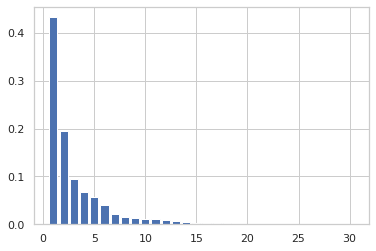

In [ ]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

plt.show()

#### PCAで2次元に圧縮

In [ ]:
# 次元数2まで圧縮して学習
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print("X_train_pca shape: {}".format(X_train_pca.shape))

X_test_pca = pca.transform(X_test_scaled)
print("X_test_pca shape: {}".format(X_test_pca.shape))

X_train_pca shape: (426, 2)
X_test_pca shape: (143, 2)


explained variance ratio: [0.43315126 0.19586506]


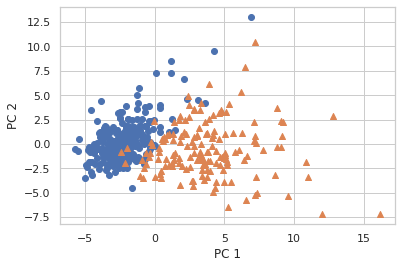

In [ ]:
# 寄与率
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp["Outcome"] = y_train.values
b = temp[temp["Outcome"] == 0]
m = temp[temp["Outcome"] == 1]
plt.scatter(x=b[0], y=b[1], marker="o") # 良性○
plt.scatter(x=m[0], y=m[1], marker="^") # 悪性△
plt.xlabel("PC 1") # 第1主成分をx軸
plt.ylabel("PC 2") # 第2主成分をy軸

plt.show()

In [ ]:
# 2次元で学習と検証

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_pca, y_train)

# 検証
print("Train score: {:.3f}".format(logistic.score(X_train_pca, y_train)))
print("Test score: {:.3f}".format(logistic.score(X_test_pca, y_test)))
print("Confustion matrix:\n{}".format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_pca))))

Train score: 0.965
Test score: 0.937
Confustion matrix:
[[84  6]
 [ 3 50]]


### 課題の答え
- 2次元でも93.7％と高い分類精度があると考える

### 考察のまとめ

- 検証用データで、30次元の97.2％に対して、2次元に圧縮すると93.7%となる
- 精度が3.5%低下しているのは、モデルを簡略化するメリットの代償として妥当だと考える

# 5 k近傍法

- 分類のための機械学習手法
  - 最近傍のデータをk個取ってきて、それらが最も多く所属するクラスに分類する
  - kを変化させると所属するクラスが変わる。なお、k=1のときは最近傍法になる
  - kを大きくすると決定境界が滑らかになる

## 実装演習

### モジュールのインポート

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### 問題設定
人口データを分類する

#### 課題
人口データと分類結果をプロットするプロットする

## データ設定

In [ ]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

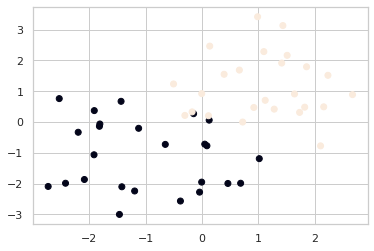

In [ ]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

plt.show()

## 予測

予測するデータ点と距離が最も近いk個の中で、ラベルの最頻値を割り当てる

In [ ]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

## 課題の答え

k=3の場合で考える

In [ ]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

Numpyで実装

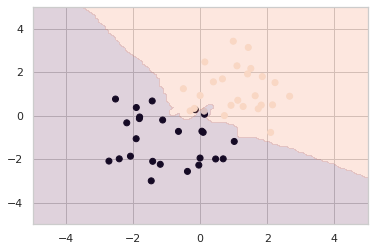

In [ ]:
y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

plt.show()

scikit-learnで実装

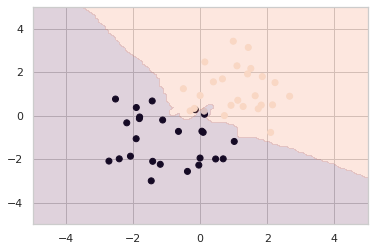

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, ys_train)
plt_resut(X_train, ys_train, knc.predict(X_test))

plt.show()

## 考察のまとめ

- k=3だと、決定境界が歪な形になる
- 正しく分類できないデータは2個で、分類精度は悪くないと考える

# 6 k-means

- 教師なし学習によるクラスタリング手法
  - 与えられたデータをk個のクラスに分類する
- k-meansアルゴリズム
  1. 各クラスタ中心の初期値をランダムに設定する
  2. 各データに対して、各クラス中心との距離を計算して、最も距離が近いクラスを割り当てる
  3. 各クラスの平均ベクトル(中心)を計算する
  4. 収束するまで、2、3を繰り返す

## 実装演習

### モジュールのインポート

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### データ生成

In [ ]:
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

### 学習

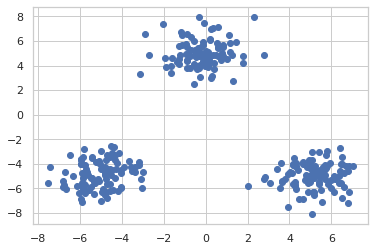

In [ ]:
#データ作成
X_train = gen_data()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

plt.show()

### クラスタリング結果

In [ ]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap="spring")
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker="X", lw=2, c="black", edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap="spring")

#### Numpy実装

In [ ]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

In [ ]:
n_clusters = 3
iter_max = 100

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

In [ ]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

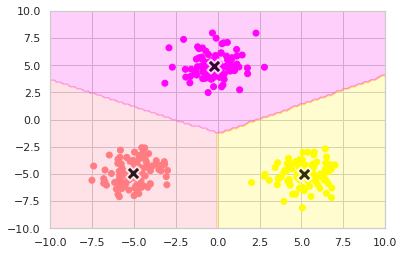

In [ ]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

plt.show()

#### scikit-learn実装

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [ ]:
print("labels: {}".format(kmeans.labels_))
print("cluster_centers: {}".format(kmeans.cluster_centers_))
kmeans.cluster_centers_

labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
cluster_centers: [[-0.20754592  4.9729993 ]
 [-5.05393688 -4.88868081]
 [ 5.14274883 -4.96265294]]


array([[-0.20754592,  4.9729993 ],
       [-5.05393688, -4.88868081],
       [ 5.14274883, -4.96265294]])

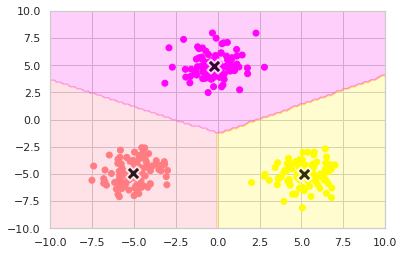

In [ ]:
plt_result(X_train, kmeans.cluster_centers_, xx)

plt.show()

### 考察のまとめ

- 元々クラスが離れたデータではあるが、3つのクラスにうまくクラスタリングできている

# 7 サポートベクトルマシン

## 要点のまとめ

- 2クラス分類問題
 - 特徴ベクトルxが与えられたときにラベルyを予想する問題
 - SVMはもともと、この問題のために構築された
 - 決定関数 $f(x) = w^T x + b$
 - ラベル $ y = sgn(f(x)) = 
\left\{
\begin{matrix}
+1 & f(x) > 0 \\
-1 & f(x) < 0
\end{matrix}
\right.  $
 - 特徴ベクトルの張る空間と決定関数の交線や超平面を分類境界という

- 線形サポートベクトル分類
 - 訓練データがすべて正しく分類できることを分離可能という $$y_i f(x_i) > 0 \quad  (i=1,2, \cdots, n)$$
 - 分類境界を挟んで2つのクラスがどのくらい離れているかをマージンという
 - マージンが大きいほど良い分類境界であり、マージン最大化が解くべき問題となる
 - 分類境界と、分類境界に最も近いデータの距離を最大化する
 - 分類境界との距離最小値 $$\min_{i} \frac{y_i [w^T x_i+ b]}{\| w \|}
= \frac{1}{\|w\|} \min_{i} \left[y_i [w^T x_i+ b] \right]
\equiv \frac{M(w,b )}{\|w\|}$$
 - SVMの目的関数 $$\max_{w,b} \left[
 \frac{1}{\|w\|} \min_{i} \left[y_i [w^T x_i+ b] \right]
\right] 
=\max_{w,b} \frac{M(w,b )}{\|w\|}$$

- 最も分類境界に近いデータが分類境界を支えることから、サポートベクトルという
- ハードマージンは、分離可能性を仮定して最適化問題を解く
- ソフトマージンは、スラック変数$\xi$を導入して多少の分類誤りを許して最適化問題を解く
  - 目的関数は次のようになる：
$$\min_{w,b,\xi} \left[ \frac{1}{2} \| w \|^2 + C \sum_{i=1}^n \xi_i \right]$$
  - Cは正則化係数

- SVMは等価な双対問題で表現できる
- 双対問題は変数を少なくできる。また、分離境界の非線形化を考える上で有利になる
- ソフトマージンの双対問題
  - ラグランジェ関数$$L(w,b,\xi,\alpha,\mu) = \frac{1}{2} \| w \|^2
+ C \sum_{i=1}^n \xi_i - \sum_{i=1}^n \alpha_i \left[ y_i [w^T x_i + b] - 1 + \xi_i \right] - \sum_{i=1}^n \mu_i \xi_i $$
  - Lに関する最適化問題から、最終的に以下のような問題が導出できる：：
  $$\max_{\alpha} \left[ -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j + \sum_{i=1}^n \alpha_i \right]
\\
\sum_{i=1}^n \alpha_i y_i = 0, \quad 0 \le \alpha_i \le C
$$

- カーネルトリック
  - 特徴ベクトルを非線形変換で高次元に拡張することで、非線形分離に対応できる対応できる
  - 非線形変換$\phi$の内積をカーネル関数で置き換えることをカーネルトリックという
  - 代表的なカーネル関数
    - 多項カーネル
    - ガウスカーネル(RBFカーネル)
    - シグモイドカーネル


## 実装演習

### モジュールのインポート

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 訓練データ生成① (線形分離可能)

In [ ]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

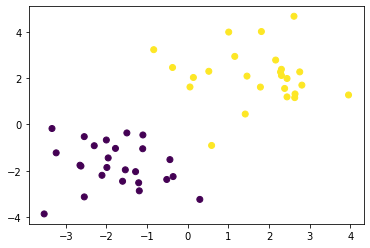

In [ ]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
plt.show()

### 学習

特徴空間上で線形モデル$y(x)= w \phi(x) + b$を用い、その正負によって2値分類を行うことを考える。

訓練データを$X = [x_{1}, x_{2}, ..., x_{n}]^T, t = [t_{1}, t_{2}, ..., t_{n}]^T (t_{i} = \{-1, +1\})$とする。

サポートベクトターマシンはマージン最大化を行い、それは結局以下の目的関数の最大化となる:

$$
\tilde{L}(a) = \sum_{i=1}^{n} a_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} a_{i} a_{j} t_{i} t_{j} \phi(x_{i})^T \phi(x_{j})
= a^T 1 - \frac{1}{2} a^T H a
$$

ここで、$H$の$i$行$j$列成分は$H_{ij} = t_{i} t_{j} \phi(x_{i})^T \phi(x_{j}) = t_{i} t_{j} k(x_{i}, x_{j})$である。また制約条件は、$a^T t = 0 (\frac{1}{2} || a^T t ||^{2} = 0)$である。

この最適化問題を最急降下法で解く。目的関数と制約条件を$a$で微分すると、

$\frac{d \tilde{L}}{d a} = 1 - H a$

$\frac{d}{d a} (\frac{1}{2} || a^T t ||^{2}) = (a^T t) t$

以上から、$a$をは以下の2式で更新すれば良い：

$a \leftarrow a + \eta_{1} (1 - H a)$

$a \leftarrow a - \eta_{2} (a^T t) t$

In [ ]:
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

### 予測

新しいデータ点$x$に対しては、$y(x)= w \phi(x) + b = \sum_{i=1}^{n} a_{i} t_{i} k(x, x_{i}) + b$の正負によって分類する。

In [ ]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [ ]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

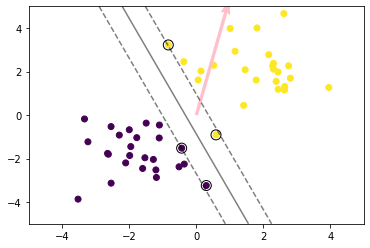

In [ ]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

plt.show()

- 誤りなく分類できている

### 訓練データ生成② （線形分離不可能）

In [ ]:
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y

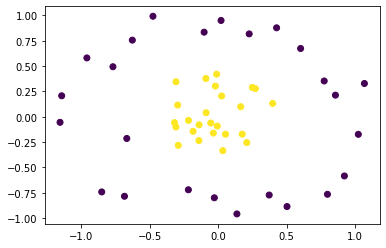

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

### 学習

- 元のデータは円状にデータが分布するので、線形分離できない
- 特徴空間で線形分離を考える
- RBFカーネルを使用する

In [ ]:
def rbf(u, v, sigma=0.8):
  return np.exp(-0.5 * ((u - v)**2).sum() / sigma**2)

In [ ]:
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# RBFカーネル
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf(X_train[i], X_train[j])

In [ ]:
eta1 = 0.01
eta2 = 0.001
n_iter = 5000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

#### 予測

In [ ]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [ ]:
xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * rbf(X_test[i], sv)
y_pred = np.sign(y_project)

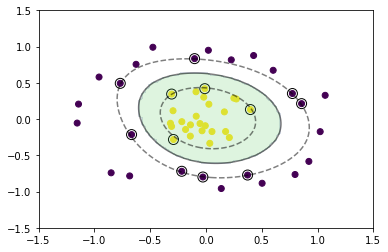

In [ ]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

sigmaが大きくなると、個々のサンプルデータが決定境界に影響しやすくなる。その場合、決定境界は複数のサンプルデータの間を通るようになるので、線形に近づく

sigmaを大きくしてみる

##### 学習

In [ ]:
# RBFカーネル
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf(X_train[i], X_train[j], sigma=1.6)

eta1 = 0.01
eta2 = 0.001
n_iter = 5000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

##### 予測

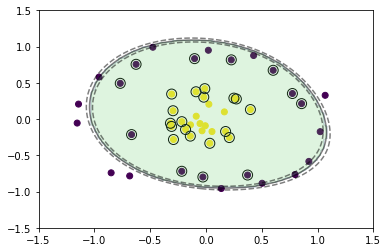

In [ ]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * rbf(X_test[i], sv)
y_pred = np.sign(y_project)

# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

- sigmaを大きくすると非線形なサンプルデータを分離出来づらくなるので、誤分類が発生する

#### ソフトマージンSVM

訓練データ生成③（重なりあり）

In [ ]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 1.
x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

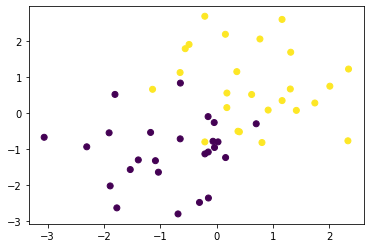

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

##### 学習

In [ ]:
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)

- ハードマージンSVMの$\alpha \ge 0$に対して、対して、$0 \le \alpha \le C$とする。上記コードのコードのa = np.clip(a, 0, C)が該当する処理となる

#### 予測

In [ ]:
index = a > 1e-8
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [ ]:
xx0, xx1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

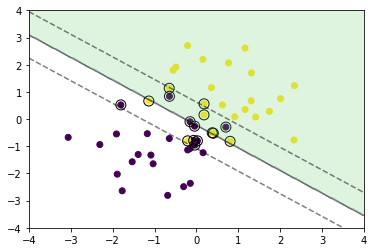

In [ ]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

- 重なりがあるサンプルデータに対しても、スラック変数で誤分類を許容すると、線形の決定境界を設定できる

### 考察のまとめ

- 非線形で分離不可なデータに対して、線形SVMはスラック変数で誤分類を許容すると決定境界を設定できる
- さらに、特徴ベクトルを非線形変換するカーネルトリック法を利用すると、非線形なデータの分離精度を向上できる
- 正則化係数やカーネル関数に含まれるパラメータはハイパーパラメータと呼ばれ、実際の学習ではこれらの調整が課題となる。手法として、パラメータをある範囲ですべて試して、最も分類精度の良いものを選ぶやり方がある。たとえば、scikit-learnライブラリでは、グリッドサーチ-交差検定を実装している